<a href="https://colab.research.google.com/github/Aftabgazali/Heart-Disease-Classification/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [330]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

## Reading CSV File

In [331]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring the dataset

In [332]:
print('This Dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

This Dataset has 303 rows and 14 columns


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [334]:
# Checking if the dataset contain null values or not
df.isnull().sum().to_frame().rename(columns={0:"Null values"})

# Therefore we don't have any null values

,Null values
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [335]:
# describe our dataset
df.describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Analysis

## Heart Attack Chance by Sex

In [336]:
new_df=df.copy()

In [337]:
# a simple function for printing different bar plots

def bar_plot(x,v1,v2,t,l1,l2,l3,rot,text):
 w = 0.315 # the width of the bars
 bar1 = np.arange(len(labels))  # the label locations
 bar2=[i+w for i in bar1]
 bar3=[i+w for i in bar2]
 fig, px= plt.subplots()
 reacts=px.bar(bar1,t,w,label=l1,color=([95/235, 70/235, 144/235]))
 rects1 = px.bar(bar2,v1,w,label=l2,color=([29/235,105/235,150/235]))
 rects2 = px.bar(bar3,v2,w,label=l3,color=([56/235,166/235,165/235]))
 fig.tight_layout()
 if rot==1:
   val='vertical'
 else:
   val='horizontal'
 plt.xticks(bar1,labels,rotation=val)
 plt.title("Heart Attack Chance By {}".format(text))
 ax.legend()
 plt.grid(axis='y',linestyle='--')
 plt.show()

In [338]:
female_attack_chances=((df['sex']==0) & (df['target']==1)).value_counts().tolist()
female_attack_chances

[231, 72]

In [339]:
male_attack_chances=((df['sex']==1) & (df['target']==1)).value_counts().tolist()
male_attack_chances

[210, 93]

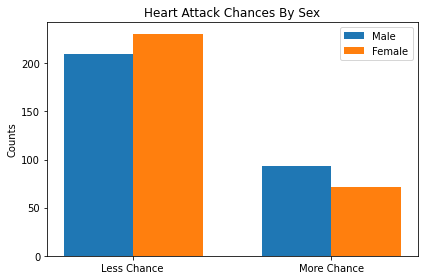

In [340]:
labels = ["Less Chance ", 'More Chance']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,male_attack_chances, width)
rects2 = ax.bar(x + width/2,female_attack_chances, width)
ax.set_ylabel('Counts')
ax.set_title('Heart Attack Chances By Sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(['Male','Female'])
fig.tight_layout()

plt.show()

## Conclusion 
**(i) Males Are more likely to get Heart Attack than females**

## Heart Attack Chance By Chest Pain

In [341]:
temp = pd.DataFrame()
for cp in df['cp'].unique().tolist():
    temp[cp] = df[df['cp']==cp]['target'].value_counts()

temp = temp.T.reset_index()
temp['index'] = pd.Series(['typical angina','atypical angina','non-anginal pain','asymptomatic'])
temp['Total sum'] = temp.sum(axis=1)

In [342]:
temp

,index,1,0,Total sum
0,typical angina,16,7,23
1,atypical angina,69,18,87
2,non-anginal pain,41,9,50
3,asymptomatic,39,104,143


In [343]:
labels=temp.iloc[:,0].values
labels=labels.tolist()

In [344]:
more_chance=temp.iloc[:,1].values
more_chance=more_chance.tolist()

In [345]:
less_chance=temp.iloc[:,2].values
less_chance=less_chance.tolist()

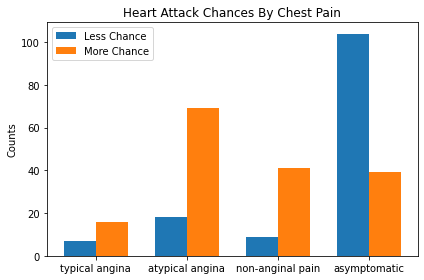

In [346]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,less_chance, width)
rects2 = ax.bar(x + width/2,more_chance, width)
ax.set_ylabel('Counts')
ax.set_title('Heart Attack Chances By Chest Pain')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(['Less Chance','More Chance'])
fig.tight_layout()

plt.show()

## Conclusion 
**(i) Most of the Patients have asymptomatic chest pain**

**(ii) Chance of getting a Heart Attack is more if you have   atypical  angina**

## Heart Attack Chance by Fasting Blood Sugar 

In [347]:
temp = pd.DataFrame()
for fbs in df['fbs'].unique().tolist():
    temp[fbs] = df[df['fbs']==fbs]['target'].value_counts()

temp = temp.T.reset_index()
temp['index'] = pd.Series(['fasting blood sugar > 120 mg/dl','fasting blood sugar < 120 mg/dl'])
temp['Total sum'] = temp.sum(axis=1)

temp

,index,1,0,Total sum
0,fasting blood sugar > 120 mg/dl,23,22,45
1,fasting blood sugar < 120 mg/dl,142,116,258


In [348]:
labels=temp.iloc[:,0].values
labels=labels.tolist()

In [349]:
more_chance=temp.iloc[:,1].values
more_chance=more_chance.tolist()

In [350]:
less_chance=temp.iloc[:,2].values
less_chance=less_chance.tolist()

In [351]:
total=temp.iloc[:,3].values
total=total.tolist()

No handles with labels found to put in legend.


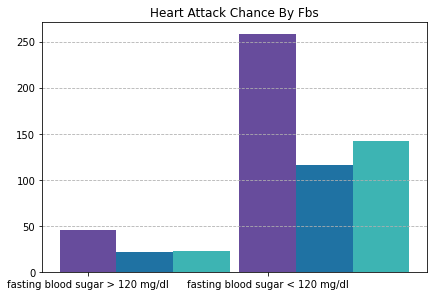

In [352]:
bar_plot(labels,less_chance,more_chance,total,"Total","less chance","more chance",0,"Fbs")

## Conclusion 
**(i) There is more chance of getting a Heart Attack if the Fasting blood sugar is less than 120 mg/dl**

## Heart Attack chance by Resting Electrocardiographic

In [353]:
temp = pd.DataFrame()
for restecg	in df['restecg'].unique().tolist():
    temp[restecg] = df[df['restecg']==restecg]['target'].value_counts()

temp.columns=['Normal','ST-T wave abnormality','Probable left ventricular hypertrophy']
temp = temp.T.reset_index()
temp['Total']=temp.sum(axis=1)
temp

,index,0,1,Total
0,Normal,79,68,147
1,ST-T wave abnormality,56,96,152
2,Probable left ventricular hypertrophy,3,1,4


In [354]:
labels=['Normal','ST-T wave abnormality','Probable left ventricular hypertrophy']
less_chance=temp.iloc[:,1].values
more_chance=temp.iloc[:,2].values
total=temp.iloc[:,3].values

No handles with labels found to put in legend.


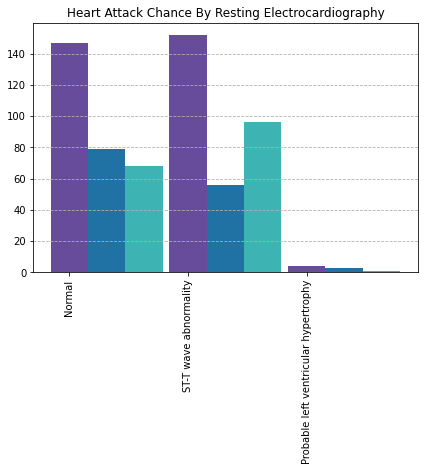

In [355]:
bar_plot(labels,less_chance,more_chance,total,"Total","less chance","more chance",1,"Resting Electrocardiography")

## Conclusion
**(i) Most Patient who suffers from Heart Attack have ST-T wave abnormality**

**(ii) Few patients suffers from Probable left ventricular hypertrophy**


## Heart Attack Chance by exang

In [356]:
temp=pd.DataFrame()

for ex in df['exang'].unique().tolist():
  temp[ex]=df[df['exang']==ex]['target'].value_counts()
temp.columns=['Exercise Induced Angina','Absence of Exercise Induced Angina']
temp = temp.T.reset_index()
temp['total']=temp.sum(axis=1)

In [357]:
temp

,index,1,0,total
0,Exercise Induced Angina,142,62,204
1,Absence of Exercise Induced Angina,23,76,99


In [358]:
more_chance=temp.iloc[:,1].values
less_chance=temp.iloc[:,2].values
total=temp.iloc[:,3].values
labels=temp.iloc[:,0].values

No handles with labels found to put in legend.


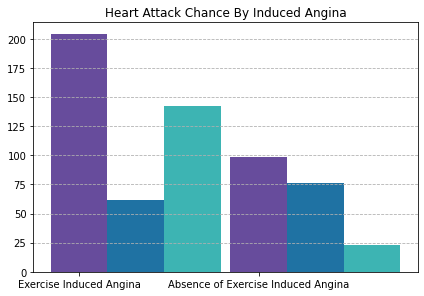

In [359]:
bar_plot(labels,less_chance,more_chance,total,"total","less chance","more chance",0,"Induced Angina")

## Conclusion
**(i) Patients Having Exercise Induced Angina are more likely to have heart attack than the patient having Abscence of Exercise Induced Angina**

**(ii)There are more Patients having Exercise Induced Angina**

**(iii)Patient suffering from Abscence of Exercise Induced Angina are less likely to have an Heart Attack and can be considered as a healthy person**

## Heart Attack Chance by Slope(The slope of the peak exercise ST segment)

In [360]:
df['slope_cat']=df['slope'].replace({0:'Down',1:'Flat',2:'Up'})
temp=pd.DataFrame()

for slp in df['slope_cat'].unique().tolist():
  temp[slp]=df[df['slope_cat']==slp]['target'].value_counts()
temp=temp.T.reset_index()
temp['total']=temp.sum(axis=1)
temp

,index,0,1,total
0,Down,12,9,21
1,Up,35,107,142
2,Flat,91,49,140


In [361]:
more_chance=temp.iloc[:,2].values
less_chance=temp.iloc[:,1].values
total=temp.iloc[:,3].values
labels=temp.iloc[:,0].values

No handles with labels found to put in legend.


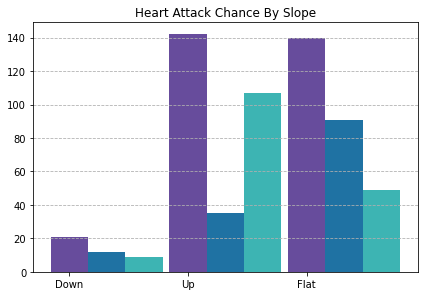

In [362]:
bar_plot(labels,less_chance,more_chance,total,"Total","less chance","more chance",0,"Slope")

## Conclusion
**(i) Patients suffering from Up slope has more chances of having a heart attack**

**(ii) Only Few Patients suffer from Down slope and are very unlikely to get an heart attack**

**(iii) The Proportion of Patients suffering from Flat slope is nearly same as Patients suffering from Uo slope however Patients who has Flat slope are less likely to get an Heart Attack**

## Heart Attack Chance by ca(number of major vessels)

In [363]:
temp=pd.DataFrame()
for vessel in df['ca'].unique().tolist():
  temp[vessel]=df[df['ca']==vessel]['target'].value_counts()
temp=temp.T.reset_index()
temp['total']=temp.sum(axis=1)
temp=temp.sort_values(by='index')
temp

,index,1,0,total
0,0,130,45,175
2,1,21,44,66
1,2,7,31,40
3,3,3,17,23
4,4,4,1,9


In [364]:
labels=temp.iloc[:,0].values
more_chance=temp.iloc[:,1].values
less_chance=temp.iloc[:,2].values
total=temp.iloc[:,3].values

No handles with labels found to put in legend.


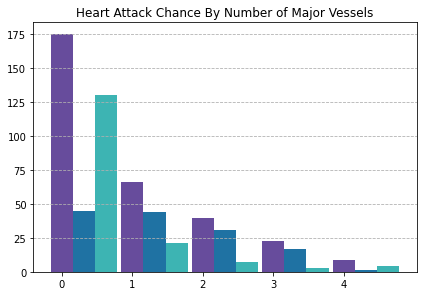

In [365]:
bar_plot(labels,less_chance,more_chance,total,"Total","less chance","more chance",0,"Number of Major Vessels")

## Conclusion
**(i) Patients having no major vessels are more likely to get an Heart Attack**

**(ii) There are a large number of patients who do not have any major vessel**

## Heart Attack Chance by Thall(Heart Status  as Retrieved from Thallium)

In [366]:
temp=pd.DataFrame()
for thal in df['thal'].unique().tolist():
  temp[thal]=df[df['thal']==thal]['target'].value_counts()
temp=temp.T.reset_index()
temp['total']=temp.sum(axis=1)
temp=temp.sort_values(by='index')

In [367]:
more_chance=temp.iloc[:,2].values
less_chance=temp.iloc[:,1].values
labels=temp.iloc[:,0].values
total=temp.iloc[:,3].values

No handles with labels found to put in legend.


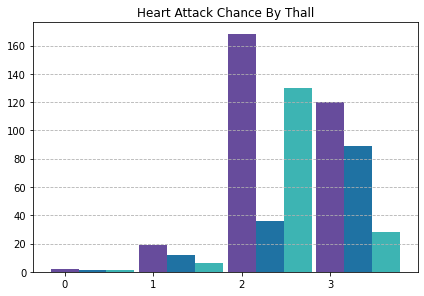

In [368]:
bar_plot(labels,less_chance,more_chance,total,"Total","less chance","more chance",0,"Thall")

## Conclusion
**(i) Patient suffereng from Thall value of 2 are more likely to get a heart attack**

**(ii) There are a large number of patients who have their thall value of 2**

## Heart Attack Chance by Age

In [369]:
df['Age Category']=pd.cut(df['age'],bins=[0,39,49,59,69,79],labels=['25-39','40-49','50-59','60-69','70-79']).to_frame()

temp=pd.DataFrame()
for age in df['Age Category'].unique().tolist():
  temp[age]=df[df['Age Category']==age]['target'].value_counts()
temp=temp.T.reset_index()
temp['total']=temp.sum(axis=1)
temp=temp.sort_values(by='index')
temp

,index,0,1,total
1,25-39,4,12,16
2,40-49,22,50,72
3,50-59,60,65,125
0,60-69,48,32,80
4,70-79,4,6,10


In [370]:
more_chance=temp.iloc[:,2].values
less_chance=temp.iloc[:,1].values
total=temp.iloc[:,3].values
labels=temp.iloc[:,0].values

No handles with labels found to put in legend.


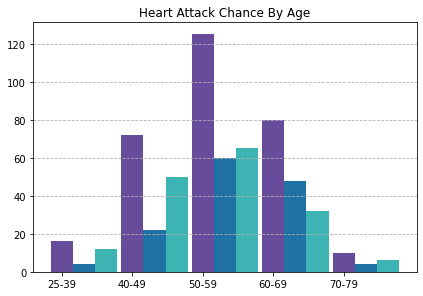

In [371]:
bar_plot(labels,less_chance,more_chance,total,"Total","less chance","more chance",0,"Age")

## Conclusion
**(i) Most Patient are between 50 years to 59 years**

**(ii) Patient Between Age 50-59 are more likely to suffer from a Heart Attack**

**(iii) Patients Between Age 25-39 have less chance of getting a Heart Attack**

## Heart Attack Chance by trestbps

In [372]:
df['bps category']=pd.cut(df['trestbps'],bins=[0,90,120,200],labels=["Low Blood Pressure","Purrfect Blood Pressure","High Blood Pressure"]).to_frame()
temp=pd.DataFrame()
for t in df['bps category'].unique().tolist():
  temp[t]=df[df['bps category']==t]['target'].value_counts()
temp=temp.T.reset_index()
temp['total']=temp.sum(axis=1)
temp

,index,1,0,total
0,High Blood Pressure,105,101,206
1,Purrfect Blood Pressure,60,37,97


In [373]:
more_chance=temp.iloc[:,1].values
less_chance=temp.iloc[:,2].values
total=temp.iloc[:,3].values
labels=temp.iloc[:,0].values

No handles with labels found to put in legend.


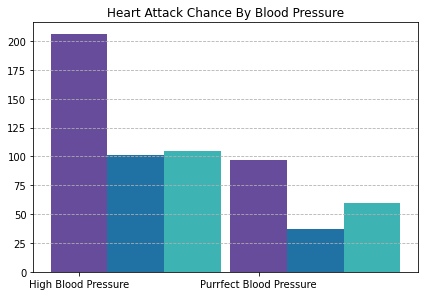

In [374]:
bar_plot(labels,less_chance,more_chance,total,"Total","less chance","more chance",0,"Blood Pressure")

## Conclusion
**(i) There are Many Patients suffering from High Blood Pressure**

**(ii) Patients Suffering from High Blood Pressure are more likely to get a Heart Attack than Patients having perfect blood pressure**

## Heart Attack Chance by Cholestrol level

In [375]:
df['chol category']=pd.cut(df['chol'],bins=[0,200,240,600],labels=['Purrfect','Borderline','High']).to_frame()

temp=pd.DataFrame()
for chol in df['chol category'].unique().tolist():
  temp[chol]=df[df['chol category']==chol]['target'].value_counts()
temp=temp.T.reset_index()
temp['total']=temp.sum(axis=1)
temp

,index,1,0,total
0,Borderline,63,38,101
1,High,72,79,151
2,Purrfect,30,21,51


In [376]:
more_chance=temp.iloc[:,1].values
less_chance=temp.iloc[:,2].values
total=temp.iloc[:,3].values
labels=temp.iloc[:,0].values

No handles with labels found to put in legend.


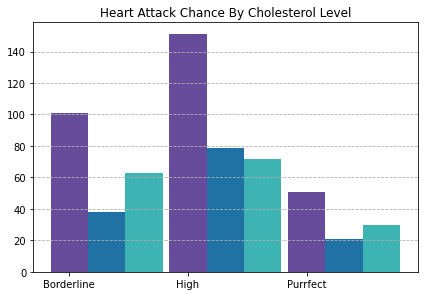

In [377]:
bar_plot(labels,less_chance,more_chance,total,"Total","less chance","more chance",0,"Cholesterol Level")

## Conclusion
**(i) Most Patient Suffer from High Cholestrol level**

**(ii) Patient having high cholestrol level are more likely to get a Heart Attack**

**(iii) Chances of getting a Heart Attack is nearly the same even for a Patient Suffering from a Borderline Cholesterol level**

**(iv) Hence we can conclude that cholestrol is very Harmful and must be kept under control**

## Heart Attack Chance By Thalach

In [378]:
temp = pd.DataFrame(index=[['Average heart rate(target=0)','Average heart rate (target=1)']])
for age in df['Age Category'].unique().tolist():
    temp[age] = df[df['Age Category']==age][['thalach','target']].groupby('target').mean().astype(int).values
temp

,60-69,25-39,40-49,50-59,70-79
Average heart rate(target=0),138,152,143,137,127
Average heart rate (target=1),145,178,166,157,132


In [379]:
temp=temp.T
temp

,Average heart rate(target=0),Average heart rate (target=1)
60-69,138,145
25-39,152,178
40-49,143,166
50-59,137,157
70-79,127,132


In [380]:
labels=temp.index.tolist()
more_chance=temp.iloc[:,1].values
less_chance=temp.iloc[:,0].values

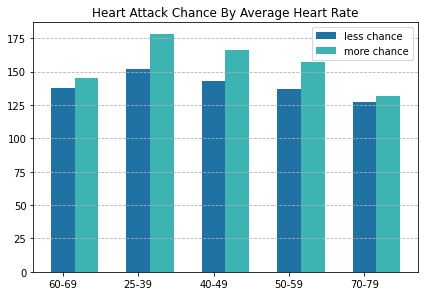

In [381]:
w = 0.315 # the width of the bars
bar1 = np.arange(len(labels))  # the label locations
bar2=[i+w for i in bar1]
fig, ax = plt.subplots()
rects1 = ax.bar(bar1,less_chance,w,label="less chance",color=([29/235,105/235,150/235]))
rects2 = ax.bar(bar2,more_chance,w,label="more chance",color=([56/235,166/235,165/235]))
fig.tight_layout()
plt.xticks(bar1,labels)
plt.title("Heart Attack Chance By Average Heart Rate")
ax.legend()
plt.grid(axis='y',linestyle='--')
plt.show()

## Conclusion 
**(i) The Average Heart Rate for age between 25-39 can reach up to 178 bpm and are more likely to receive a Heart Attack**

**(ii) The Average Heart rate for a Healthy Person can reach upto 152 bpm**

**(iii) Older Persons Ideal Average Heart Rate can reach up to 127
bpm**

**(iv) The Average Heart Rate gets linearly slower as the age progresses**

## Maximum Heart Rate vs Age

In [382]:
fig = px.scatter(data_frame=df,
                 y='age',
                 x='thalach',
                 color='target')
fig['layout'].update(title='Maximum heart rate achieve vs Age',titlefont=dict(size=20),xaxis=dict(title='Maximum heart rate achieve',titlefont=dict(size=18)))
fig.show()

## ST depression induced by exercise relative to rest vs. Age

In [383]:
fig = px.scatter(data_frame=df,
                 y='age',
                 x='oldpeak',
                 color='target')
fig['layout'].update(title='Maximum heart rate achieve vs Age',titlefont=dict(size=20),xaxis=dict(title='Maximum heart rate achieve',titlefont=dict(size=18)))
fig.show()

## Conclusion
**(i) Patients Having Old peak less than 2 are more likely to receive a Heart Attack**

**(ii) Patients Having Old peak of more than 4 are less likely to receive a Heart Attack** 

## Resting Blood Pressure vs Age

In [384]:
fig = px.scatter(data_frame=df,
                 y='age',
                 x='trestbps',
                 color='target')
fig['layout'].update(title='Resting Blood Pressure vs Age',titlefont=dict(size=20),xaxis=dict(title='Resting Blood Pressure',titlefont=dict(size=18)))
fig.show()

## Cholesterol levels vs Age

In [385]:
fig = px.scatter(data_frame=df,
                 y='chol',
                 x='age',
                 color='target')
fig['layout'].update(title='Cholesterol vs Age',titlefont=dict(size=20),xaxis=dict(title='Cholesterol',titlefont=dict(size=18)))
fig.show()

## Outlier Detection Using Box and Whisker Plot

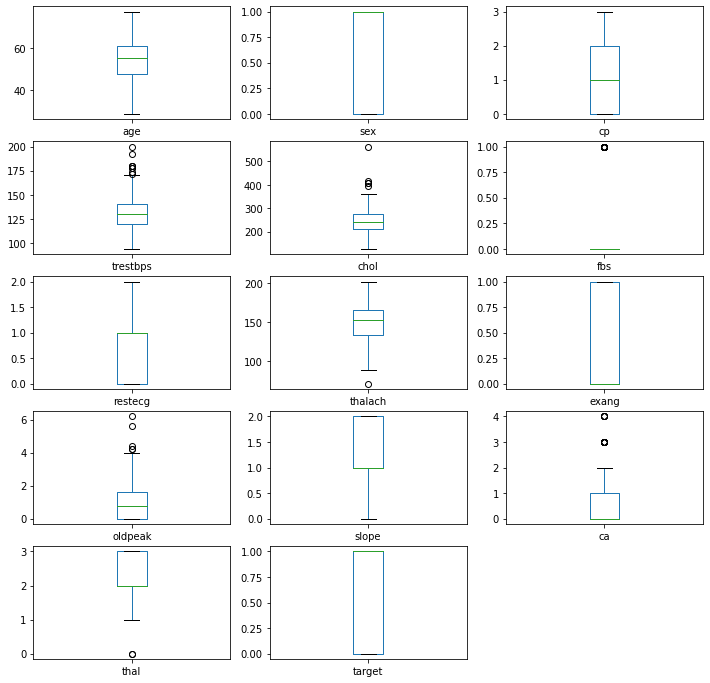

In [386]:
new_df.plot(kind='box',subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

## We've Outliers in trestbps,chol,ca,oldpeak

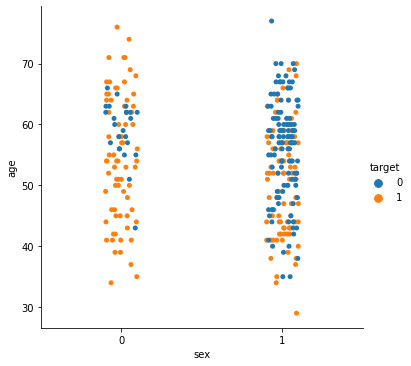

In [387]:
sns.catplot(data=new_df, x='sex',y='age',hue='target')
plt.show()

In [388]:
## This plot shows that men having age greater than 70 do not have any heart disease which is clearly an outlier

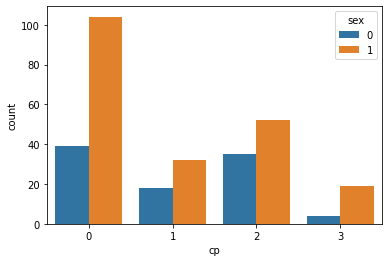

In [389]:
sns.countplot(x='cp',hue='sex',data=new_df)

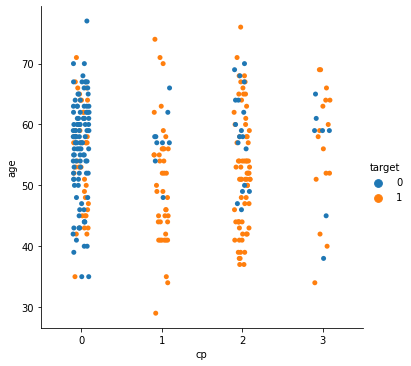

In [390]:
sns.catplot(x='cp',y='age',hue='target',data=new_df)

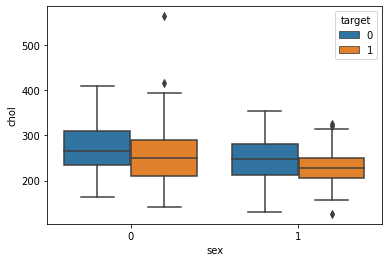

In [391]:
sns.boxplot(x='sex',y='chol',hue='target',data=new_df)

## Here we can conclude that in both sex having heart disease in cholestrol has outliers

## Outlier Removal 

In [392]:
## This is an Outlier since As Age is high the chance of having heart disease is also high
new_df=new_df[~((new_df['age']>=70) & (new_df['target']==0))]

In [393]:
new_df.shape

(299, 14)

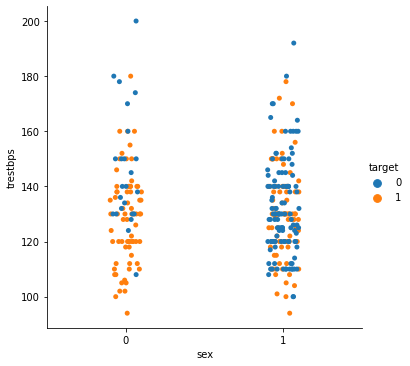

In [394]:
sns.catplot(data=df,x='sex',y='trestbps',hue='target')

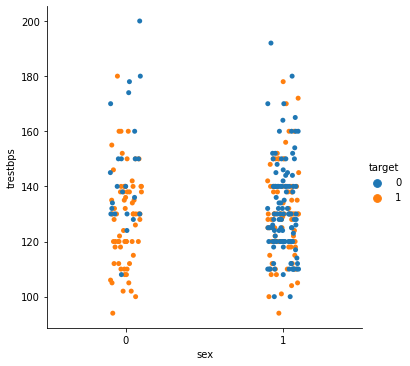

In [395]:
sns.catplot(data=new_df,x='sex',y='trestbps',hue='target')

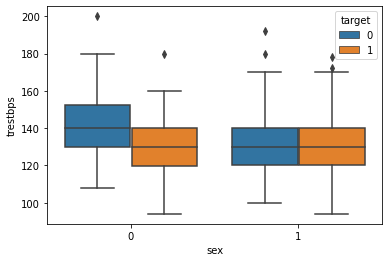

In [396]:
sns.boxplot(x='sex',y='trestbps',hue='target',data=new_df)

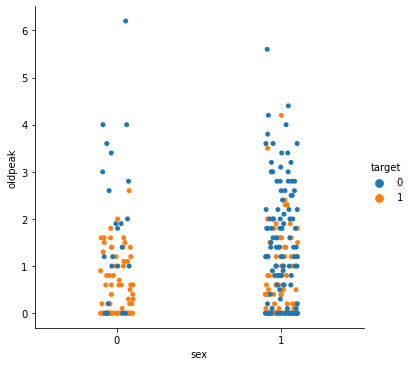

In [397]:
sns.catplot(x='sex',y='oldpeak',hue='target',data=new_df)

In [398]:
new_df=new_df[~((new_df['oldpeak']>=3) & (new_df['target']==1))]

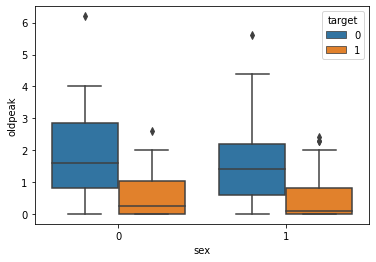

In [399]:
sns.boxplot(x='sex',y='oldpeak',hue='target',data=new_df)

In [400]:
new_df=new_df[~((new_df['age']<=35) & (new_df['target']==1))]

## Feature Engineering

In [401]:
new_df['thalach/age']=new_df['thalach']/new_df['age']
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach/age
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2.380952
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4.195122
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3.178571
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2.859649
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,2.596491


In [402]:
cols = new_df.columns.tolist()

In [403]:
cols = cols[-1:] + cols[:-1]

In [404]:
 new_df = new_df[cols]

In [405]:
new_df.head()

,thalach/age,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2.380952,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,4.195122,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3.178571,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,2.859649,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,2.596491,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


## Defining X and y

In [406]:
X=new_df.iloc[:,:-1].values
y=new_df.iloc[:,-1].values

## Splitting the Data

In [407]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=41)

## Scaling the Data

In [408]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Testing Using Different Models

In [409]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [410]:
base_models = [("XGB_model", XGBClassifier(random_state=42, n_jobs=-1,use_label_encoder=False)),  #XGBoost model
               ("SVM",      SVC()),                                                               #Support Vector Machines
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),                       #Logistic Regression model
               ("DT_model", DecisionTreeClassifier(random_state=42)),                             #Decision tree model
               ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1)),                  #Random Forest model
               ("Bagging_model",BaggingClassifier(base_estimator=DecisionTreeClassifier(),        #Bagging model
                                                 max_samples=30,
                                                 n_estimators=500,
                                                 n_jobs=-1,
                                                 bootstrap=True,
                                                 oob_score=True)),
               ("Random_subspaces_model",BaggingClassifier(base_estimator=DecisionTreeClassifier(),#Random subspaces model
                                                           n_estimators=100,
                                                           bootstrap=False,
                                                           max_samples=1.0,
                                                           max_features=True,
                                                            n_jobs=-1)),
                ("Random_Patches_model", BaggingClassifier(base_estimator=DecisionTreeClassifier(),#Random Patches model
                                                            n_estimators=100,
                                                            bootstrap=True,
                                                            max_samples=1.0,
                                                            max_features=True,
                                                            bootstrap_features=True,
                                                            n_jobs=-1)),
                ("AdaBoost_model",AdaBoostClassifier(DecisionTreeClassifier(),                      #AdaBoost model
                                                    n_estimators=100,
                                                    learning_rate=0.01)),
                ("GradientBoosting",GradientBoostingClassifier(max_depth=2,                        #GradientBoosting model
                                                              n_estimators=100))]

In [411]:
accuracies = {}
model = base_models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
for name,model in base_models:
    model.fit(X_train, y_train)
    acc = model.score(X_test,y_test)*100
    accuracies[name] = acc
    print("{} Accuracy Score : {:.2f}%".format(name,acc))

XGB_model Accuracy Score : 91.53%
SVM Accuracy Score : 69.49%
LR_model Accuracy Score : 86.44%
DT_model Accuracy Score : 69.49%
RF_model Accuracy Score : 89.83%
Bagging_model Accuracy Score : 86.44%
Random_subspaces_model Accuracy Score : 74.58%
Random_Patches_model Accuracy Score : 79.66%
AdaBoost_model Accuracy Score : 64.41%
GradientBoosting Accuracy Score : 84.75%


## Conclusion
**XGB Classifier Model is best suited for this type of Classification**

## Clustering the data

In [412]:
X_temp=new_df.iloc[:,[0,4]].values

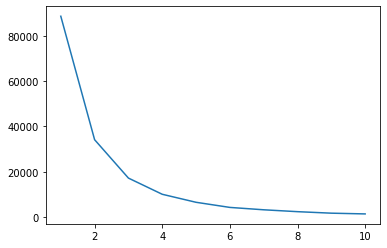

In [413]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    xgb=KMeans(n_clusters=i,init='k-means++')
    xgb.fit(X_temp)
    wcss.append(xgb.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

# Using Elbow method the value of k must be 4

In [414]:
xgb=KMeans(n_clusters=4,init='k-means++')
y_pred=xgb.fit_predict(X_temp)

In [415]:
y_pred

array([2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 3, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 3, 2, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 3, 2, 2, 0, 3, 0, 3, 3, 0, 2, 2, 3, 0, 0, 0,
       0, 3, 2, 0, 2, 0, 2, 0, 3, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 0, 0, 2,
       0, 3, 2, 2, 3, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 3, 1, 2, 2, 3, 0, 0,
       0, 0, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 0, 1, 2, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 3, 2, 1, 0, 2, 0, 0, 1, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 0, 2, 0, 2, 0, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 2, 0, 3,
       2, 3, 0, 0, 2, 3, 0, 0, 0, 2, 2, 1, 2, 0, 0, 3, 3, 0, 2, 1, 1, 0,
       3, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 3, 0, 0, 1,
       0, 3, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 3,
       1, 2, 0, 2, 2, 0, 1, 3, 0, 3, 3, 3, 1, 0, 0, 0, 0, 2, 0, 3, 3, 0,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 0, 2, 0, 1,
       2, 3, 2, 0, 0], dtype=int32)

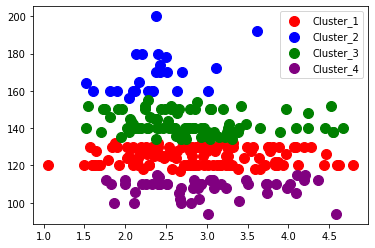

In [416]:
plt.scatter(X_temp[y_pred==0,0],X_temp[y_pred==0,1],color='r',s=100,label='Cluster_1')
plt.scatter(X_temp[y_pred==1,0],X_temp[y_pred==1,1],color='b',s=100,label='Cluster_2')
plt.scatter(X_temp[y_pred==2,0],X_temp[y_pred==2,1],color='g',s=100,label='Cluster_3')
plt.scatter(X_temp[y_pred==3,0],X_temp[y_pred==3,1],color='purple',s=100,label='Cluster_4')
plt.legend()

## Building Confusion Matrix

In [417]:
from xgboost import XGBClassifier
xgb1=XGBClassifier()
xgb1.fit(X_train,y_train)
y_predicted=xgb1.predict(X_test)

In [418]:
# Making Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predicted)
accuracy_score(y_test,y_predicted)

0.9152542372881356

Text(69.0, 0.5, 'Truth')

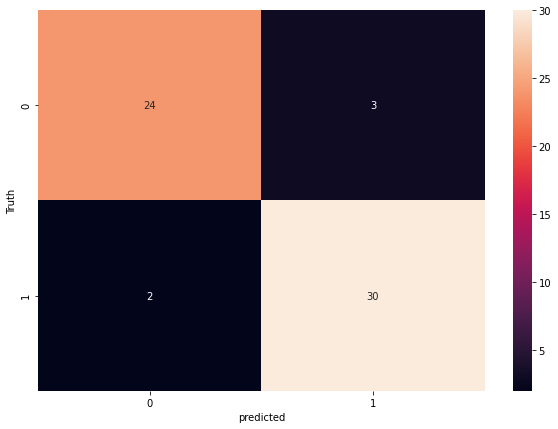

In [419]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')